In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools,visualisations

%matplotlib inline

In [2]:
fHC=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/30may15/SalishSea_1d_20150530_20150530_ptrc_T.nc')
fnew=nc.Dataset('/data/eolson/MEOPAR/SS36runs/CedarRuns/spring15_R2/SalishSea_1h_20150411_20150530_ptrc_T_20150521-20150530.nc')
fnew2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/CedarRuns/spring15_R3/SalishSea_1h_20150411_20150530_ptrc_T_20150521-20150530.nc')
mesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')

In [3]:
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2015,5,30)
flen=10
namfmt='long'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':1,'grid_T':1}
df1=et.loadDFO()
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,12.0,NaN,None,5.28,mg/m^3,6.6,13.6,umol/L,NaN,NaN,12.0,1982-07-16 01:21:00
1,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,21.5,NaN,None,0.61,mg/m^3,21.2,45.0,umol/L,NaN,NaN,21.5,1982-07-16 01:21:00
2,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,30.5,NaN,None,NaN,mg/m^3,23.5,47.4,umol/L,NaN,NaN,30.5,1982-07-16 01:21:00
3,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,52.3,NaN,None,NaN,mg/m^3,28.0,50.2,umol/L,NaN,NaN,52.3,1982-07-16 01:21:00
4,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,75.4,NaN,None,NaN,mg/m^3,26.5,49.1,umol/L,NaN,NaN,75.4,1982-07-16 01:21:00


In [4]:
df2=df1.loc[df1.Year==2015]
df3=df2.loc[df2.Si>60]
df4=df2.loc[df2.Si<60]

In [5]:
cm1=cmocean.cm.matter
cm2=cmocean.cm.balance
cm1.set_bad('gray')
cm2.set_bad('gray')

In [6]:
fHC.variables['deptht_bounds'][0,:]

array([0.       , 1.0000012], dtype=float32)

635 126 -124.86022 49.60356


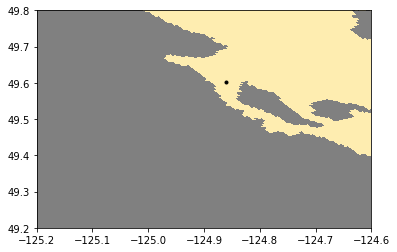

In [7]:
plt.pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,0,:,:]==0,fHC.variables['silicon'][-1,0,:,:]),vmin=40,vmax=70,cmap=cm1)
plt.plot(mesh['nav_lon'][635,126],mesh['nav_lat'][635,126],'k.')
plt.xlim(-125.2,-124.6)
plt.ylim(49.2,49.8)
print(635,126,mesh['nav_lon'][635,126],mesh['nav_lat'][635,126])

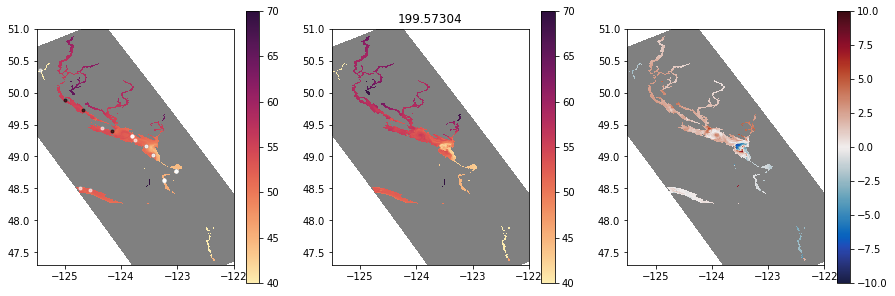

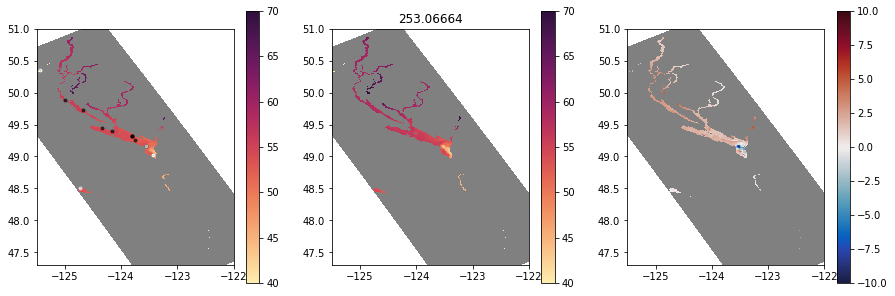

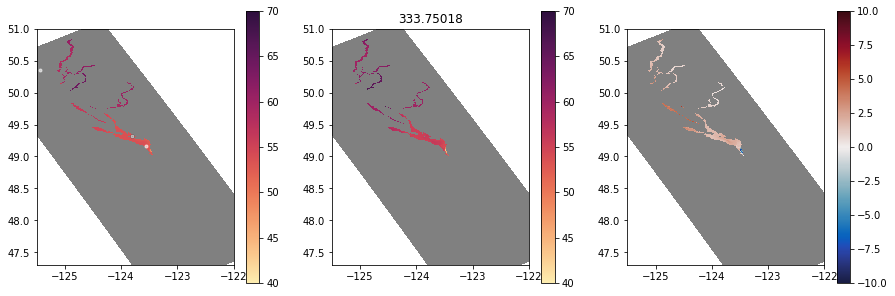

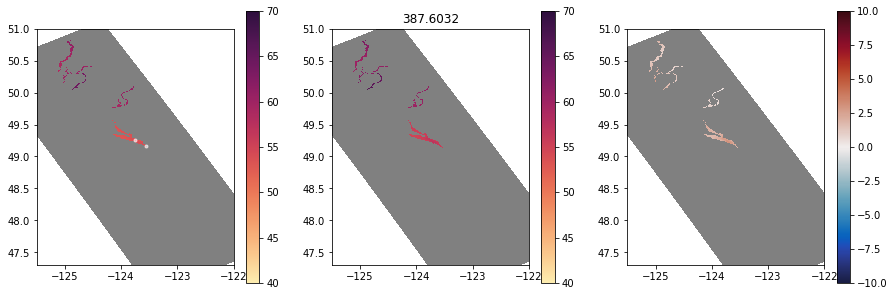

In [8]:
for k in (30,32,35,37):
    dfi=df3.loc[(df3.Z>fHC['deptht_bounds'][k,0])&(df3.Z<fHC['deptht_bounds'][k,1])]
    dfl=df4.loc[(df4.Z>fHC['deptht_bounds'][k,0])&(df4.Z<fHC['deptht_bounds'][k,1])]
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    m0=ax[0].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fHC.variables['silicon'][-1,k,:,:]),vmin=40,vmax=70,cmap=cm1)
    fig.colorbar(m0,ax=ax[0])
    ax[0].set_xlim(-125.5,-122)
    ax[0].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[0],coords='map')
    ax[0].plot(dfi['Lon'],dfi['Lat'],'k.',alpha=.6)
    ax[0].plot(dfl['Lon'],dfl['Lat'],'w.',alpha=.6)
    m1=ax[1].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew.variables['silicon'][-1,k,:,:]),vmin=40,vmax=70,cmap=cm1)
    fig.colorbar(m1,ax=ax[1])
    ax[1].set_xlim(-125.5,-122)
    ax[1].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[1],coords='map')
    ax[1].set_title(fHC.variables['deptht'][k])
    m2=ax[2].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew.variables['silicon'][-1,k,:,:]-fHC.variables['silicon'][-1,k,:,:]),
                        vmin=-10,vmax=10,cmap=cm2)
    fig.colorbar(m2,ax=ax[2])
    viz_tools.set_aspect(ax[2],coords='map')
    ax[2].set_xlim(-125.5,-122)
    ax[2].set_ylim(47.3,51)

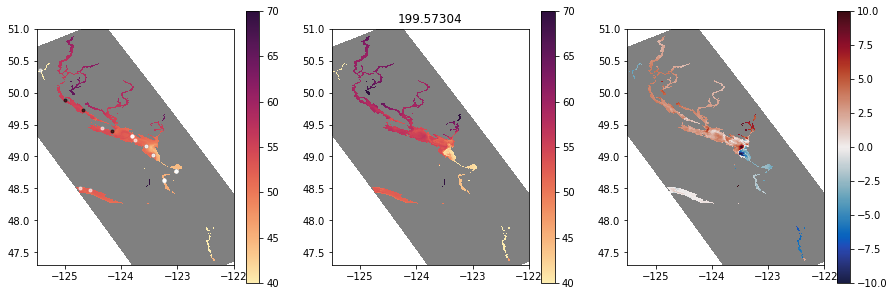

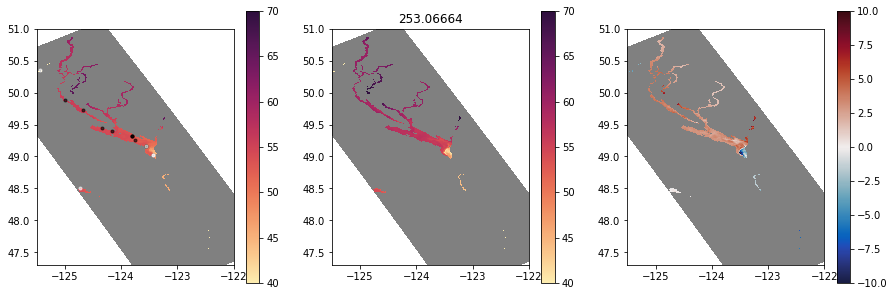

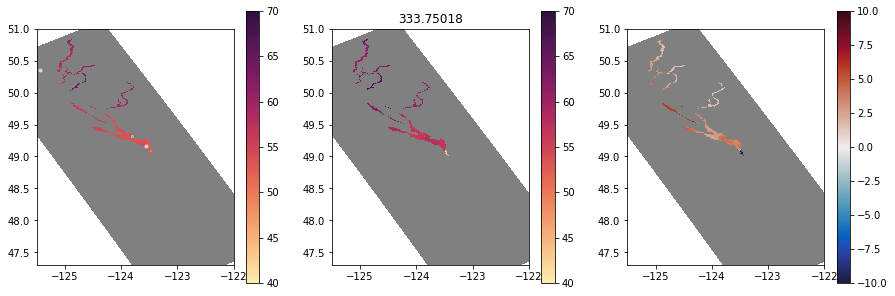

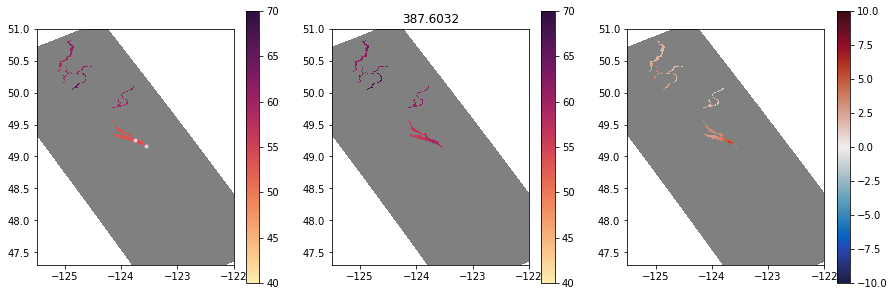

In [9]:
for k in (30,32,35,37):
    dfi=df3.loc[(df3.Z>fHC['deptht_bounds'][k,0])&(df3.Z<fHC['deptht_bounds'][k,1])]
    dfl=df4.loc[(df4.Z>fHC['deptht_bounds'][k,0])&(df4.Z<fHC['deptht_bounds'][k,1])]
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    m0=ax[0].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fHC.variables['silicon'][-1,k,:,:]),vmin=40,vmax=70,cmap=cm1)
    fig.colorbar(m0,ax=ax[0])
    ax[0].set_xlim(-125.5,-122)
    ax[0].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[0],coords='map')
    ax[0].plot(dfi['Lon'],dfi['Lat'],'k.',alpha=.6)
    ax[0].plot(dfl['Lon'],dfl['Lat'],'w.',alpha=.6)
    m1=ax[1].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew2.variables['silicon'][-1,k,:,:]),vmin=40,vmax=70,cmap=cm1)
    fig.colorbar(m1,ax=ax[1])
    ax[1].set_xlim(-125.5,-122)
    ax[1].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[1],coords='map')
    ax[1].set_title(fHC.variables['deptht'][k])
    m2=ax[2].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew2.variables['silicon'][-1,k,:,:]-fHC.variables['silicon'][-1,k,:,:]),
                        vmin=-10,vmax=10,cmap=cm2)
    fig.colorbar(m2,ax=ax[2])
    viz_tools.set_aspect(ax[2],coords='map')
    ax[2].set_xlim(-125.5,-122)
    ax[2].set_ylim(47.3,51)

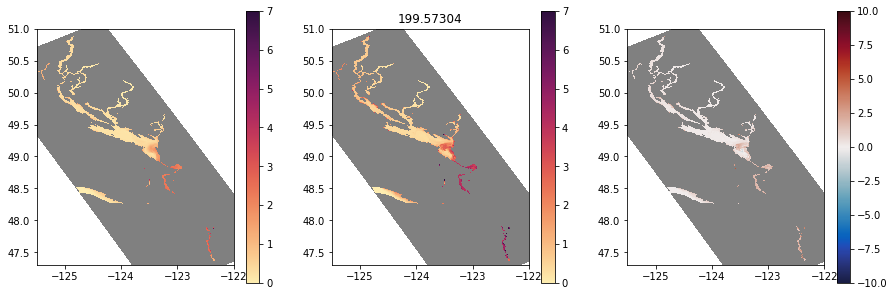

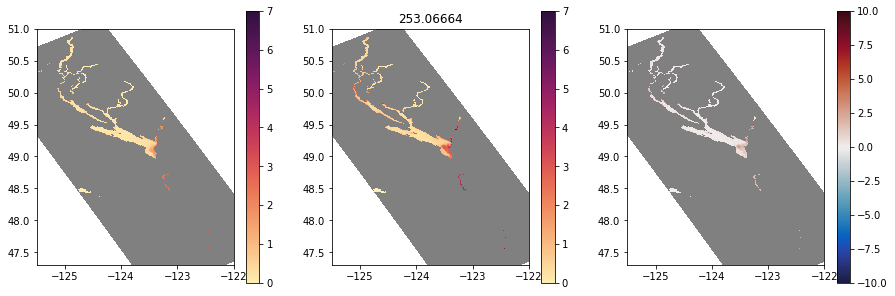

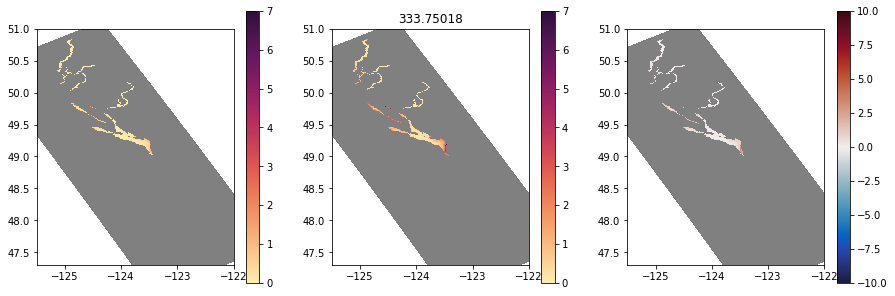

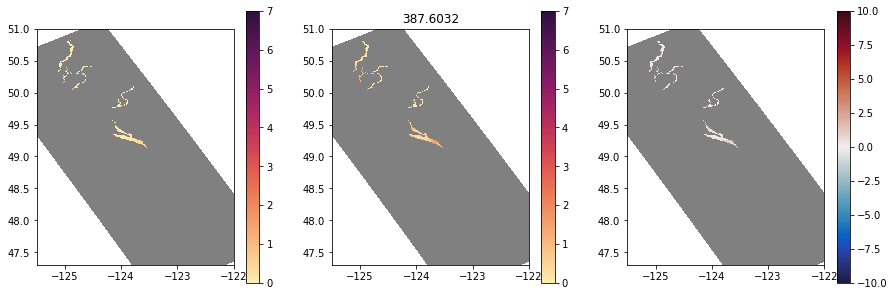

In [10]:
for k in (30,32,35,37):
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    m0=ax[0].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fHC.variables['biogenic_silicon'][-1,k,:,:]),vmin=0,vmax=7,cmap=cm1)
    fig.colorbar(m0,ax=ax[0])
    ax[0].set_xlim(-125.5,-122)
    ax[0].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[0],coords='map')
    m1=ax[1].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew.variables['biogenic_silicon'][-1,k,:,:]),vmin=0,vmax=7,cmap=cm1)
    fig.colorbar(m1,ax=ax[1])
    ax[1].set_xlim(-125.5,-122)
    ax[1].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[1],coords='map')
    ax[1].set_title(fHC.variables['deptht'][k])
    m2=ax[2].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew.variables['biogenic_silicon'][-1,k,:,:]-fHC.variables['biogenic_silicon'][-1,k,:,:]),
                        vmin=-10,vmax=10,cmap=cm2)
    fig.colorbar(m2,ax=ax[2])
    viz_tools.set_aspect(ax[2],coords='map')
    ax[2].set_xlim(-125.5,-122)
    ax[2].set_ylim(47.3,51)

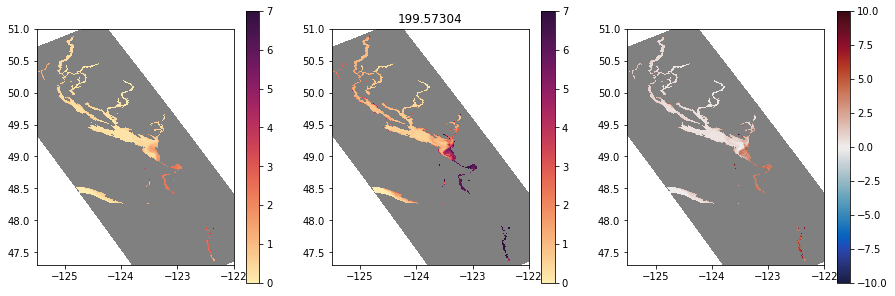

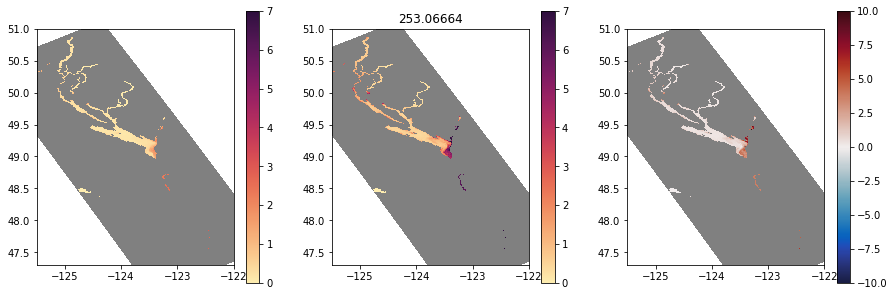

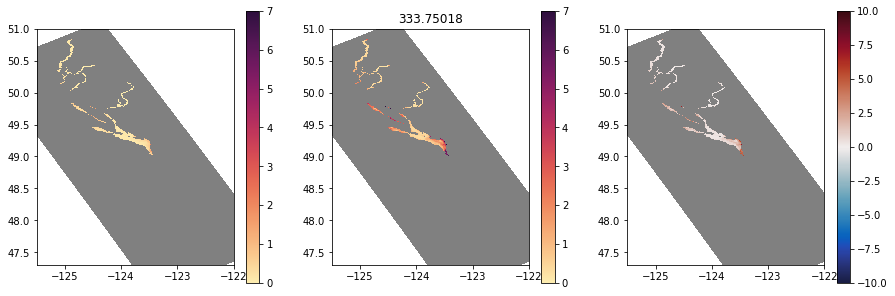

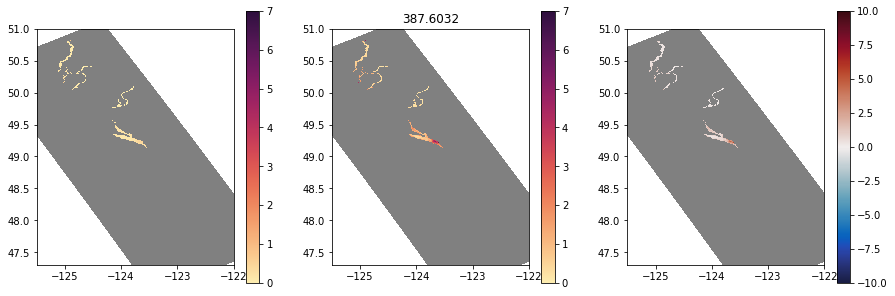

In [11]:
for k in (30,32,35,37):
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    m0=ax[0].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fHC.variables['biogenic_silicon'][-1,k,:,:]),vmin=0,vmax=7,cmap=cm1)
    fig.colorbar(m0,ax=ax[0])
    ax[0].set_xlim(-125.5,-122)
    ax[0].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[0],coords='map')
    m1=ax[1].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew2.variables['biogenic_silicon'][-1,k,:,:]),vmin=0,vmax=7,cmap=cm1)
    fig.colorbar(m1,ax=ax[1])
    ax[1].set_xlim(-125.5,-122)
    ax[1].set_ylim(47.3,51)
    viz_tools.set_aspect(ax[1],coords='map')
    ax[1].set_title(fHC.variables['deptht'][k])
    m2=ax[2].pcolormesh(mesh['nav_lon'],mesh['nav_lat'],np.ma.masked_where(mesh['tmask'][0,k,:,:]==0,fnew2.variables['biogenic_silicon'][-1,k,:,:]-fHC.variables['biogenic_silicon'][-1,k,:,:]),
                        vmin=-10,vmax=10,cmap=cm2)
    fig.colorbar(m2,ax=ax[2])
    viz_tools.set_aspect(ax[2],coords='map')
    ax[2].set_xlim(-125.5,-122)
    ax[2].set_ylim(47.3,51)

#### now look at Si along thalweg in hindcast201812
- first, ch

In [12]:
mar=dict()
mar[15]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15mar15/SalishSea_1d_20150315_20150315_ptrc_T.nc')
mar[16]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15mar16/SalishSea_1d_20160315_20160315_ptrc_T.nc')
mar[17]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15mar17/SalishSea_1d_20170315_20170315_ptrc_T.nc')
mar[18]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15mar18/SalishSea_1d_20180315_20180315_ptrc_T.nc')
mesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
bathyf=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thpts=np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

In [13]:
depth = mesh.variables['gdept_0'][:]

dep_thal, distance, thTmask = visualisations.load_thalweg(
    depth[0, ...], mesh.variables['tmask'][0,...], mesh.variables['nav_lon'][:], mesh.variables['nav_lat'][:],
    thpts)
marbSi=dict();marSi=dict()
for ii in (15,16,17,18):
    dep_thal, distance, marbSi[ii] = visualisations.load_thalweg(depth[0, ...], mar[ii].variables['biogenic_silicon'][-1,:,:,:], 
                            mar[ii].variables['nav_lon'][:], mar[ii].variables['nav_lat'][:],thpts)
    dep_thal, distance, marSi[ii] = visualisations.load_thalweg(depth[0, ...], mar[ii].variables['silicon'][-1,:,:,:], 
                            mar[ii].variables['nav_lon'][:], mar[ii].variables['nav_lat'][:],thpts)

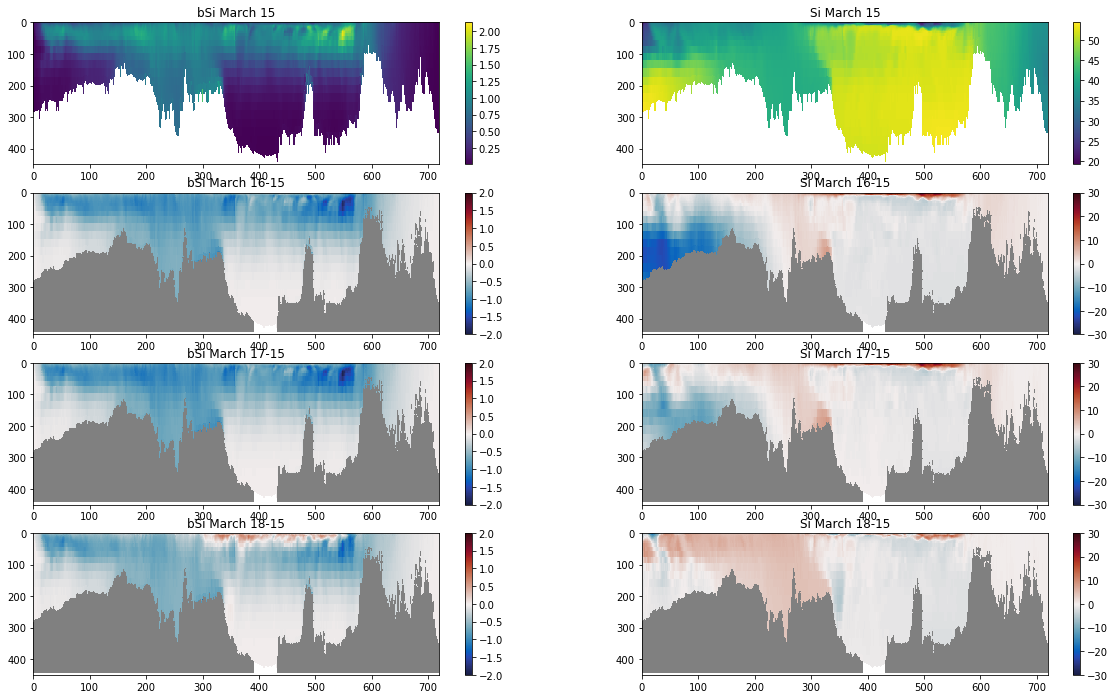

In [14]:
fig,ax=plt.subplots(4,2,figsize=(20,12))
m0=ax[0,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,marbSi[15]))
ax[0,0].set_title('bSi March 15')
ax[0,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,0])
m0=ax[0,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,marSi[15]))
ax[0,1].set_title('Si March 15')
ax[0,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,1])

m0=ax[1,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marbSi[16]-marbSi[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[1,0].set_title('bSi March 16-15')
ax[1,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,0])
m0=ax[1,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marSi[16]-marSi[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[1,1].set_title('Si March 16-15')
ax[1,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,1])

m0=ax[2,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marbSi[17]-marbSi[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[2,0].set_title('bSi March 17-15')
ax[2,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,0])
m0=ax[2,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marSi[17]-marSi[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[2,1].set_title('Si March 17-15')
ax[2,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,1])

m0=ax[3,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marbSi[18]-marbSi[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[3,0].set_title('bSi March 18-15')
ax[3,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[3,0])
m0=ax[3,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marSi[18]-marSi[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[3,1].set_title('Si March 18-15')
ax[3,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[3,1])

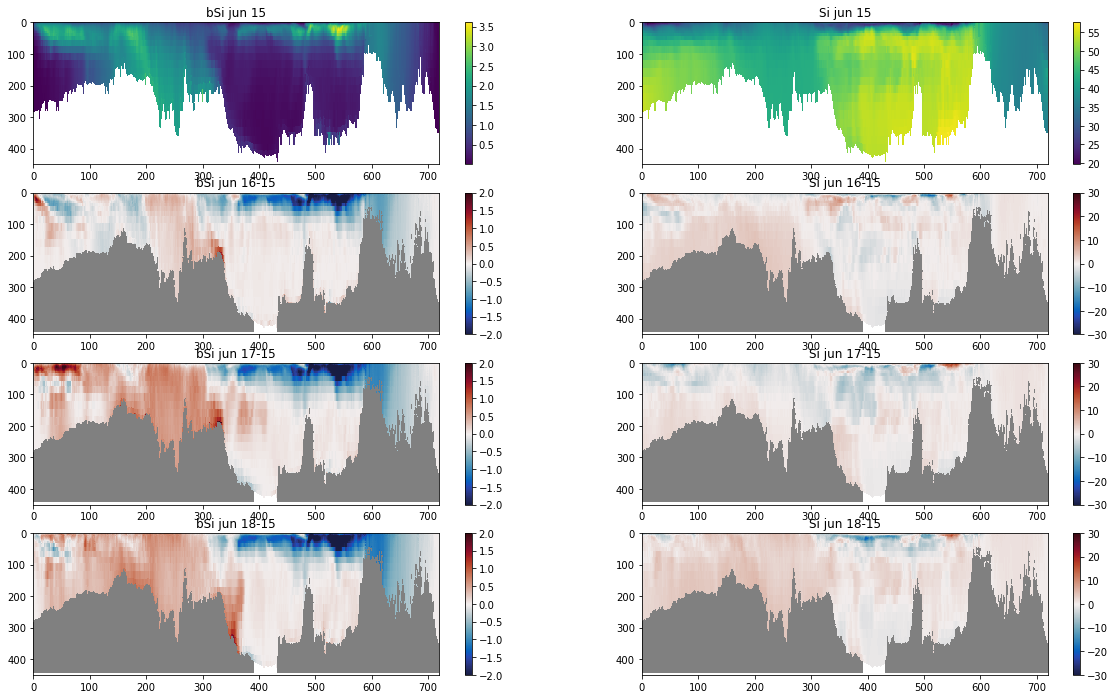

In [15]:
# try june:
jun=dict()
jun[15]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15jun15/SalishSea_1d_20150615_20150615_ptrc_T.nc')
jun[16]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15jun16/SalishSea_1d_20160615_20160615_ptrc_T.nc')
jun[17]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15jun17/SalishSea_1d_20170615_20170615_ptrc_T.nc')
jun[18]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15jun18/SalishSea_1d_20180615_20180615_ptrc_T.nc')
junbSi=dict();junSi=dict()
for ii in (15,16,17,18):
    dep_thal, distance, junbSi[ii] = visualisations.load_thalweg(depth[0, ...], jun[ii].variables['biogenic_silicon'][-1,:,:,:], 
                            jun[ii].variables['nav_lon'][:], jun[ii].variables['nav_lat'][:],thpts)
    dep_thal, distance, junSi[ii] = visualisations.load_thalweg(depth[0, ...], jun[ii].variables['silicon'][-1,:,:,:], 
                            jun[ii].variables['nav_lon'][:], jun[ii].variables['nav_lat'][:],thpts)
fig,ax=plt.subplots(4,2,figsize=(20,12))
m0=ax[0,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,junbSi[15]))
ax[0,0].set_title('bSi jun 15')
ax[0,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,0])
m0=ax[0,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,junSi[15]))
ax[0,1].set_title('Si jun 15')
ax[0,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,1])

m0=ax[1,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junbSi[16]-junbSi[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[1,0].set_title('bSi jun 16-15')
ax[1,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,0])
m0=ax[1,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junSi[16]-junSi[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[1,1].set_title('Si jun 16-15')
ax[1,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,1])

m0=ax[2,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junbSi[17]-junbSi[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[2,0].set_title('bSi jun 17-15')
ax[2,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,0])
m0=ax[2,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junSi[17]-junSi[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[2,1].set_title('Si jun 17-15')
ax[2,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,1])

m0=ax[3,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junbSi[18]-junbSi[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[3,0].set_title('bSi jun 18-15')
ax[3,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[3,0])
m0=ax[3,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junSi[18]-junSi[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[3,1].set_title('Si jun 18-15')
ax[3,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[3,1])

In [16]:
# now look at N:

marNH=dict();marN=dict()
for ii in (15,16,17,18):
    dep_thal, distance, marNH[ii] = visualisations.load_thalweg(depth[0, ...], mar[ii].variables['ammonium'][-1,:,:,:], 
                            mar[ii].variables['nav_lon'][:], mar[ii].variables['nav_lat'][:],thpts)
    dep_thal, distance, marN[ii] = visualisations.load_thalweg(depth[0, ...], mar[ii].variables['nitrate'][-1,:,:,:], 
                            mar[ii].variables['nav_lon'][:], mar[ii].variables['nav_lat'][:],thpts)
    
jun=dict()
jun[15]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15jun15/SalishSea_1d_20150615_20150615_ptrc_T.nc')
jun[16]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15jun16/SalishSea_1d_20160615_20160615_ptrc_T.nc')
jun[17]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15jun17/SalishSea_1d_20170615_20170615_ptrc_T.nc')
jun[18]=nc.Dataset('/data/eolson/MEOPAR/SS36runs/linkHC201812/15jun18/SalishSea_1d_20180615_20180615_ptrc_T.nc')
junNH=dict();junN=dict()
for ii in (15,16,17,18):
    dep_thal, distance, junNH[ii] = visualisations.load_thalweg(depth[0, ...], jun[ii].variables['ammonium'][-1,:,:,:], 
                            jun[ii].variables['nav_lon'][:], jun[ii].variables['nav_lat'][:],thpts)
    dep_thal, distance, junN[ii] = visualisations.load_thalweg(depth[0, ...], jun[ii].variables['nitrate'][-1,:,:,:], 
                            jun[ii].variables['nav_lon'][:], jun[ii].variables['nav_lat'][:],thpts)

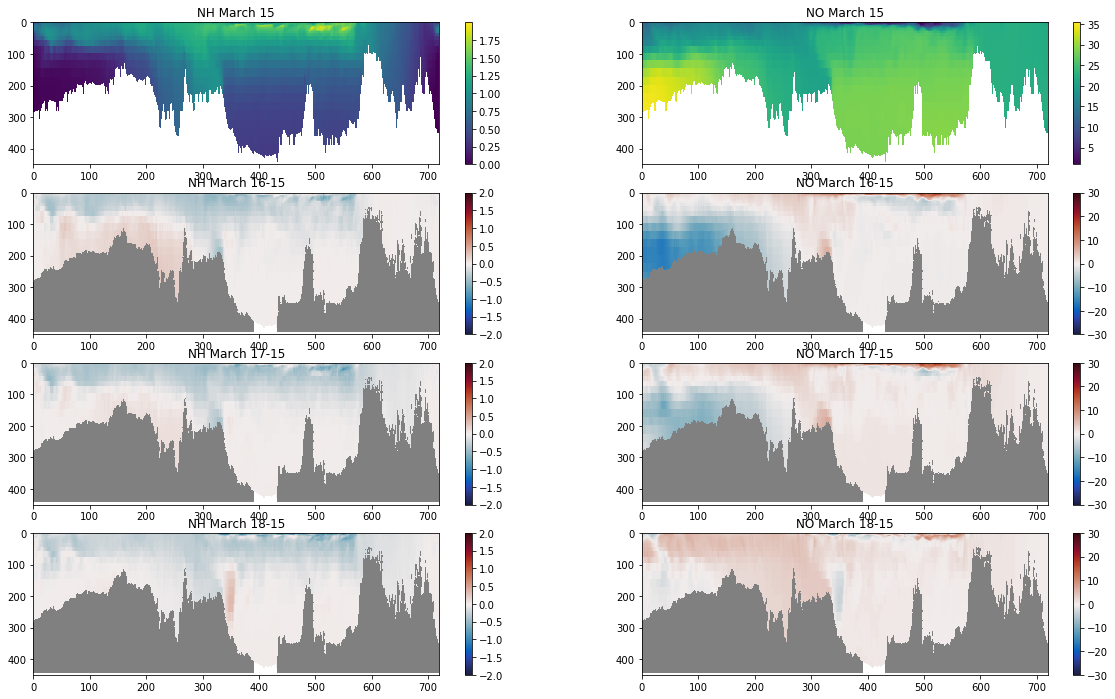

In [54]:
fig,ax=plt.subplots(4,2,figsize=(20,12))
m0=ax[0,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,marNH[15]))
ax[0,0].set_title('NH March 15')
ax[0,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,0])
m0=ax[0,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,marN[15]))
ax[0,1].set_title('NO March 15')
ax[0,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,1])

m0=ax[1,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marNH[16]-marNH[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[1,0].set_title('NH March 16-15')
ax[1,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,0])
m0=ax[1,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marN[16]-marN[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[1,1].set_title('NO March 16-15')
ax[1,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,1])

m0=ax[2,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marNH[17]-marNH[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[2,0].set_title('NH March 17-15')
ax[2,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,0])
m0=ax[2,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marN[17]-marN[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[2,1].set_title('NO March 17-15')
ax[2,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,1])

m0=ax[3,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marNH[18]-marNH[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[3,0].set_title('NH March 18-15')
ax[3,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[3,0])
m0=ax[3,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        marN[18]-marN[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[3,1].set_title('NO March 18-15')
ax[3,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[3,1])

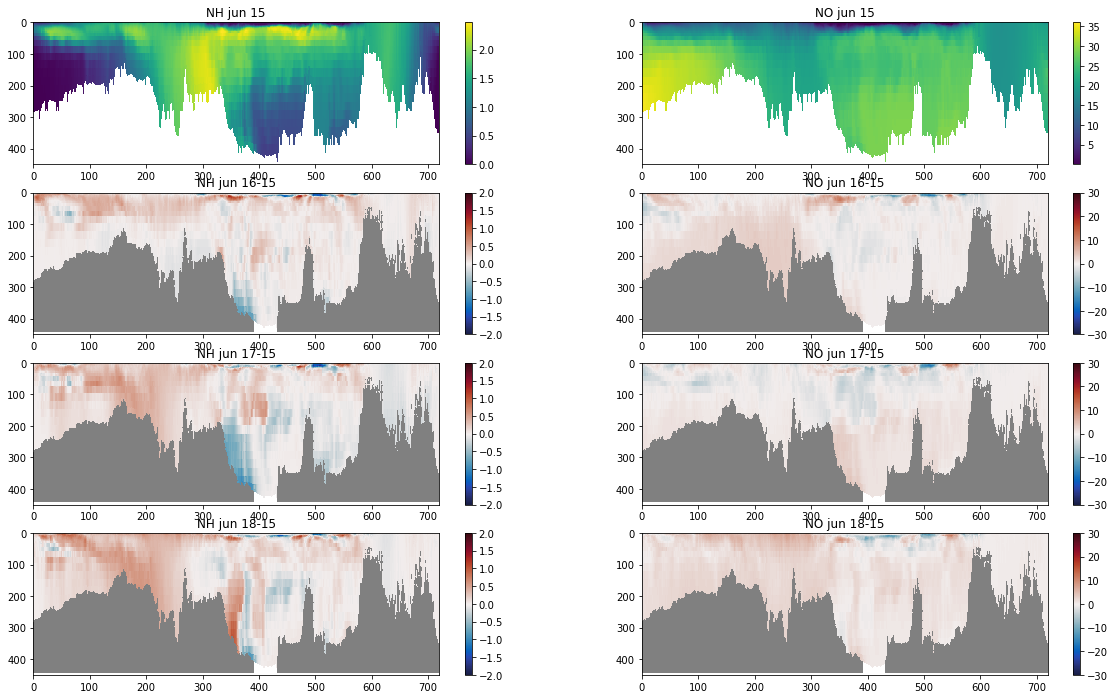

In [55]:

fig,ax=plt.subplots(4,2,figsize=(20,12))
m0=ax[0,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,junNH[15]))
ax[0,0].set_title('NH jun 15')
ax[0,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,0])
m0=ax[0,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,junN[15]))
ax[0,1].set_title('NO jun 15')
ax[0,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,1])

m0=ax[1,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junNH[16]-junNH[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[1,0].set_title('NH jun 16-15')
ax[1,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,0])
m0=ax[1,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junN[16]-junN[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[1,1].set_title('NO jun 16-15')
ax[1,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,1])

m0=ax[2,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junNH[17]-junNH[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[2,0].set_title('NH jun 17-15')
ax[2,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,0])
m0=ax[2,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junN[17]-junN[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[2,1].set_title('NO jun 17-15')
ax[2,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,1])

m0=ax[3,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junNH[18]-junNH[15]),vmin=-2,vmax=2,cmap=cmocean.cm.balance)
ax[3,0].set_title('NH jun 18-15')
ax[3,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[3,0])
m0=ax[3,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,
                                        junN[18]-junN[15]),vmin=-30,vmax=30,cmap=cmocean.cm.balance)
ax[3,1].set_title('NO jun 18-15')
ax[3,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[3,1])

In [18]:
depth = mesh.variables['gdept_0'][:]

dep_thal, distance, HCbSi = visualisations.load_thalweg(depth[0, ...], fHC.variables['biogenic_silicon'][-1,:,:,:], 
                        fHC.variables['nav_lon'][:], fHC.variables['nav_lat'][:],thpts)
dep_thal, distance, HCSi = visualisations.load_thalweg(depth[0, ...], fHC.variables['silicon'][-1,:,:,:], 
                        fHC.variables['nav_lon'][:], fHC.variables['nav_lat'][:],thpts)


dep_thal, distance, newbSi = visualisations.load_thalweg(depth[0, ...], fnew.variables['biogenic_silicon'][-1,:,:,:], 
                        fnew.variables['nav_lon'][:], fnew.variables['nav_lat'][:],thpts)
dep_thal, distance, newSi = visualisations.load_thalweg(depth[0, ...], fnew.variables['silicon'][-1,:,:,:], 
                        fnew.variables['nav_lon'][:], fnew.variables['nav_lat'][:],thpts)


dep_thal, distance, new2bSi = visualisations.load_thalweg(depth[0, ...], fnew2.variables['biogenic_silicon'][-1,:,:,:], 
                        fnew2.variables['nav_lon'][:], fnew2.variables['nav_lat'][:],thpts)
dep_thal, distance, new2Si = visualisations.load_thalweg(depth[0, ...], fnew2.variables['silicon'][-1,:,:,:], 
                        fnew2.variables['nav_lon'][:], fnew2.variables['nav_lat'][:],thpts)

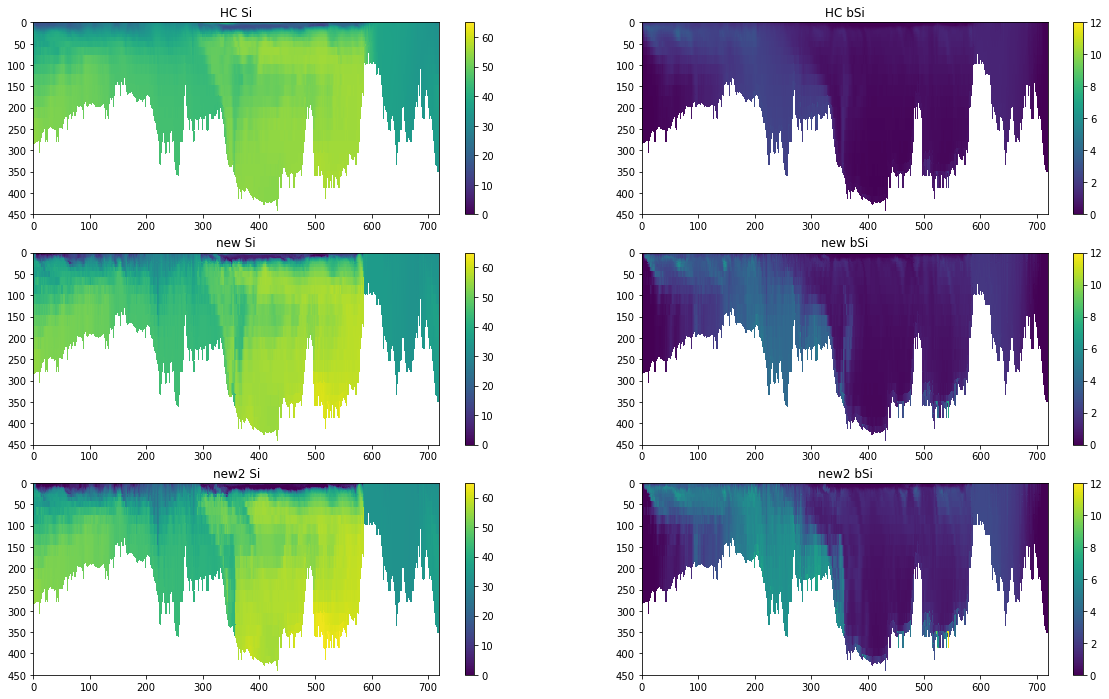

In [22]:
fig,ax=plt.subplots(3,2,figsize=(20,12))

m0=ax[0,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,HCSi),vmin=0,vmax=65)
ax[0,0].set_title('HC Si')
ax[0,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,0])
m0=ax[0,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,HCbSi),vmin=0,vmax=12)
ax[0,1].set_title('HC bSi')
ax[0,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[0,1])

m0=ax[1,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,newSi),vmin=0,vmax=65)
ax[1,0].set_title('new Si')
ax[1,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,0])
m0=ax[1,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,newbSi),vmin=0,vmax=12)
ax[1,1].set_title('new bSi')
ax[1,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[1,1])

m0=ax[2,0].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,new2Si),vmin=0,vmax=65)
ax[2,0].set_title('new2 Si')
ax[2,0].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,0])
m0=ax[2,1].pcolormesh(distance, dep_thal, np.ma.masked_where(thTmask[:,...]==0,new2bSi),vmin=0,vmax=12)
ax[2,1].set_title('new2 bSi')
ax[2,1].set_ylim(450,0)
fig.colorbar(m0,ax=ax[2,1])
